### Before approaching any Regression, Classification or Clustering algorithms I suggest to brush up or learn statistical analysis once. Either from Youtube, or from any other platform, or books. 

# Logistic Regression

This is one of the regression algorithms used for binary classification where if logistic regression is used it will always give a probability between 0 and 1. 
 - Sigmoid function or the Logistic function is used and if the linear equation y=mx+c is passed on to the sigmoid function the probability will always be between 0 and 1. 
 - Based on this probability we can set a cut of point and assign a class. For Example: 0.5 is the cut off, so if probability is 0.5 or below we can assign class 0 and if above 0.5 we can assign class 1. 

In Logistic regression you can use the same principle of training and testing the data. 
So, lets say 70 percent is training data and 30 percent is testing data. 
 - This 70 percent is used to train the model and then 30 percent to test the trained model. 

But, this trained model has to be evaluated after testing, so evaluation of logistic regression can be done using a <b> confusion matrix </b>.

What is the confusion matrix
It contains 4 quadrants (Please look for the detailed explaination on youtube or other platforms.)
1. True Positives
2. True Negatives
3. False Positives (In statistics known as Type I Error)
4. False Negatives (In statistics known as Type II Error)

On the basis of confusion matrix we can calculate or evaluate the model performance 
1. Overall Accuracy = (True Positive + True Negative)/Total {How accurate your model is}
2. Missclassification rate = (False positive + False negative)/Total  {How many times is model wrong}

## Actual Project on Logistic Regression

### This is a project to work on Titanic Dataset implementing logistic regression to predict if passenger survided or not with respect to his passenger class
### Dataset - Kaggle (Titanic dataset)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv') 

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Here we are looking for any Null values or missing values present in dataset
# Always make sure that the data is cleaned before atually fitting the model
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

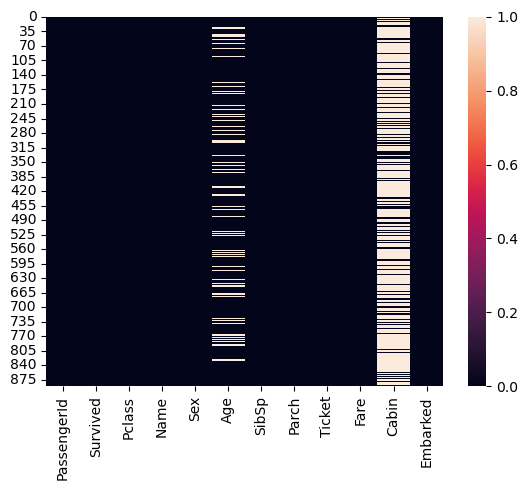

In [6]:
# here we can see the same thing for null values using seaborn heatmap
sns.heatmap(train.isnull())

In [7]:
sns.set_style('whitegrid')

We will do some more exoloratory data analysis before removing or manipulating the missing values


<AxesSubplot:xlabel='Survived', ylabel='count'>

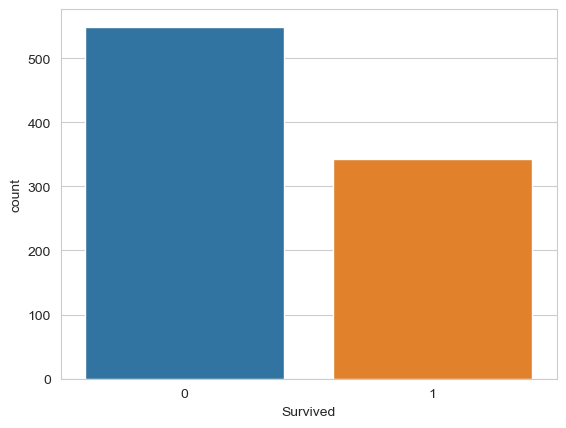

In [8]:
# We are looking for the ratio of who survived and who did not where (Not Survived is 0, and Survived is 1)
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

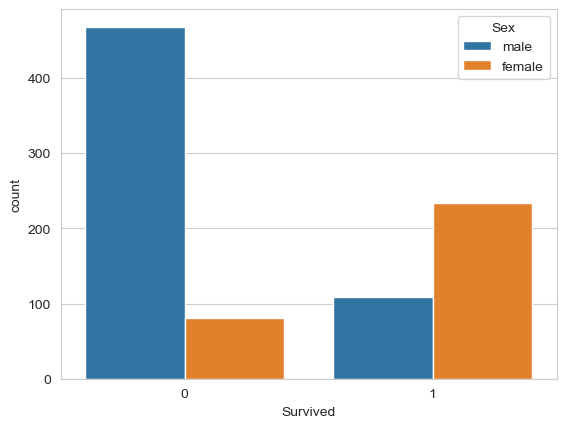

In [9]:
# Now we are looking for who survived based on sex
sns.countplot(x='Survived', data = train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

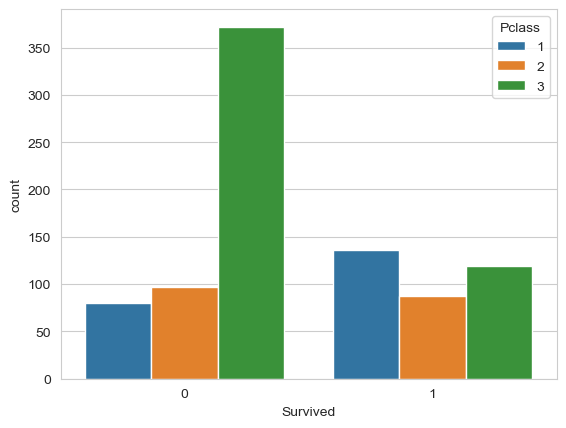

In [10]:
# Same survival based on Pclass (which is the class of people so 3rd Pclass is cheapest tickets)
sns.countplot(x='Survived', data = train, hue='Pclass')

C:\Users\Tanmay Potbhare\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

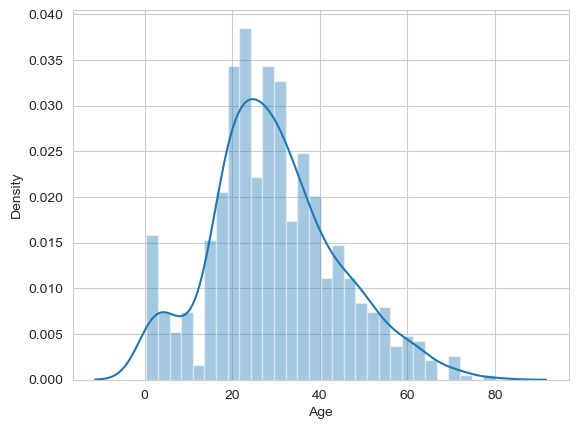

In [11]:
# Analysing the age of passengers on the titanic
sns.distplot(train['Age'].dropna(), bins=30)

<AxesSubplot:ylabel='Frequency'>

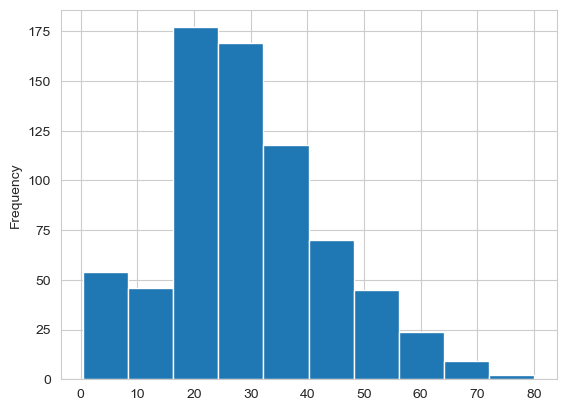

In [12]:
#or the same plot can be done using pandas own visualization 
train['Age'].plot.hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

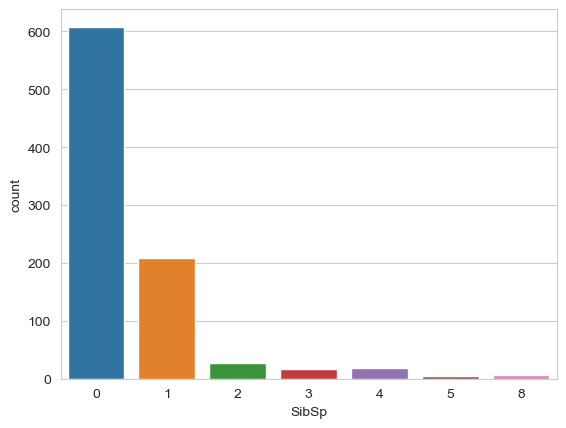

In [13]:
# We have explored Sex, Age, Pclass, Survived columns now lets see SibSp(Siblings or Spouse)
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

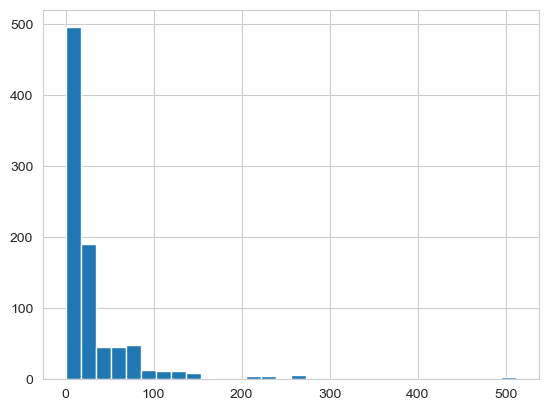

In [14]:
# Fare price analysis
train['Fare'].hist(bins=30)

### Now we can start with cleaning the data
 - First we will add the missing values in age using <b>Imputation</b>
   This can be done using getting mean of age assigning those values where missing values are present

Now we can do one thing
- Get the age according to the Passenger class and get the average of them 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

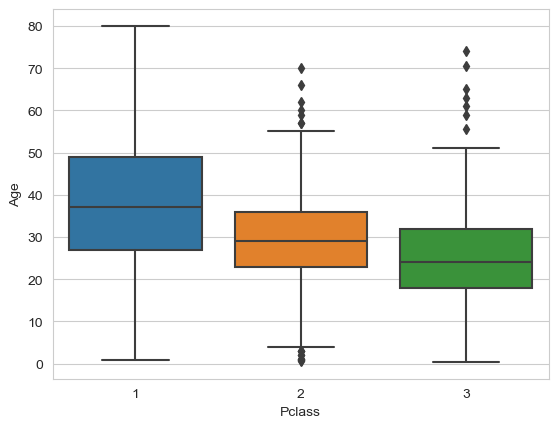

In [15]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [18]:
# Now checking if there are any null values in Age column

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

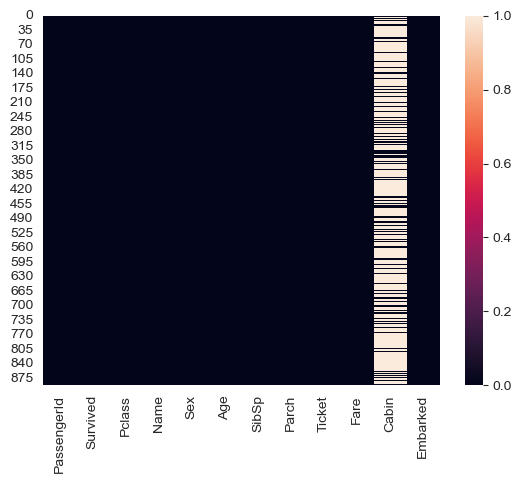

In [19]:
sns.heatmap(train.isnull())

#### Now there are too many missing values to impute Cabin Column so I will drop the column

In [20]:
train.drop('Cabin',axis=1, inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [23]:
train.dropna(inplace=True)

In [24]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Now there are no missing values in the Titanic dataset

### Now we will create a dummy variable for Machine learning model to understand it
- This means, Sex column has categorical value Male and Female. The machine learning model wont understand it unless it is converted to 0 and 1. 
- Same with Embarked Column

In [25]:
# Creating Dummy Values of Sex
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


<b>Here, the multicollinearity comes in picture. How? </b>
   - So when this dataframe is passed on to machine learning model is will say for example:
        At [0] index, female is 0 so ML model says female not present so I can surely say male is present. 
    - This will mess the prediction for ML Model which is nothing but multicollinearity

In [26]:
# In order to avoid that we will drop first column and set it to true
Sex = pd.get_dummies(train['Sex'], drop_first=True)

In [27]:
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
# Same thing with Emabarked column
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [29]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### In this case not all columns are perfect predictors of each column as we droped the C Column from Embarked

#### Moving On

In [30]:
#Adding these new dataframes as columns to train dataframe
# If you dont set axis = 1 you will get NaN Values in those columns
train = pd.concat([train,Sex,embark], axis=1)


In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [38]:
train.drop(['male','Q','S'],axis=1,inplace=True)

In [39]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

### I made a mistake where there was ambiguity for male, Q, and S so I dropped and concatednated them again

In [41]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [42]:
train = pd.concat([train,Sex,embark], axis=1)


In [43]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now machine learning model can be built around this data as all the values readable for the model in numerical format. 
We can however drop Passsenger ID as it is just copy of original index

In [45]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [47]:
train.drop('PassengerId',axis=1,inplace=True)

In [48]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Building the model and Predicting Survival with respect to Pclass

In [49]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101);

In [56]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Tanmay Potbhare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
predictions = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



### We have now succesfully Measured the evaluations of the model. 